# Statistická analýza, příprava dat

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.
!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m 	= počet řádků = 100
- x’s = vstupní proměnná / features
- y’s = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

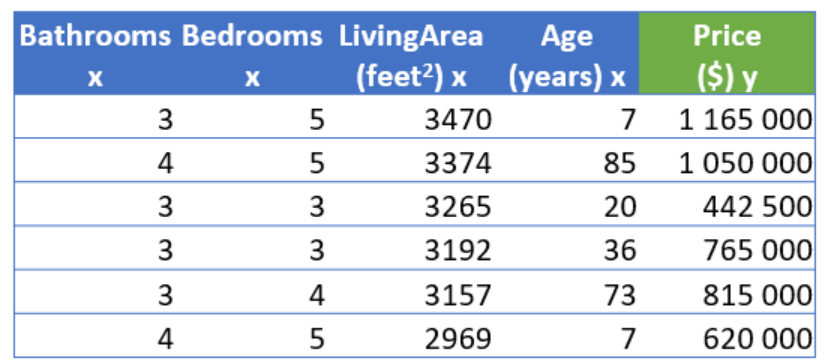

# Úkol
- Vytvořte regresní lineání model z parametrů, které jste vybrali minulé cvičení
- Data před zpracováním standardizujte
- Model vytvořte ručně
- Model vytvořte pomocí scikit-learn

# Načtení dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

# Lineání model bez pomocí knihoven
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

Parametry modelu:
Váhy: [2.09451904 2.73869485]
Bias: 2.0815171505277865

Skóre modelu:
Trénovací data: 0.7746
Validační data: 0.7329


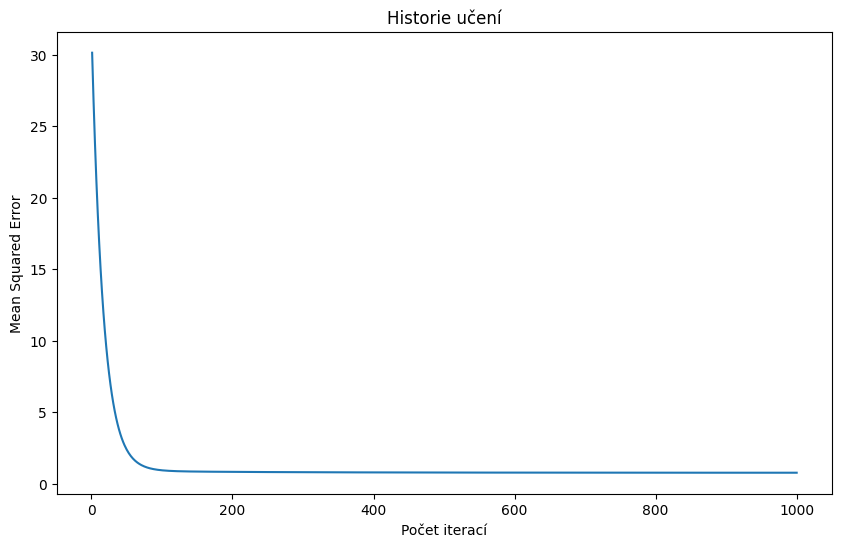

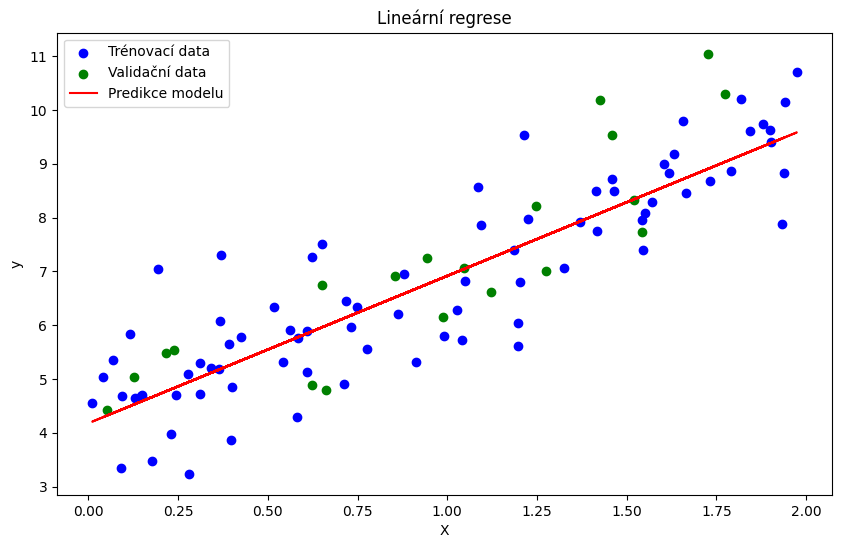

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generování dat
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Rozdělení dat na trénovací a validační
X_train, X_val = X[:80], X[80:]
y_train, y_val = y[:80], y[80:]

# Přidání sloupce jedniček pro bias term
X_train_b = np.c_[np.ones((80, 1)), X_train]
X_val_b = np.c_[np.ones((20, 1)), X_val]

# Třída pro lineární regresi
class LinearRegression:
    def __init__(self, lr=0.01, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1)
        self.bias = np.zeros((1, 1))  # Změna zde
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Výpočet gradientů
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Aktualizace vah a biasu
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Uložení MSE do historie
            mse = np.mean((y_pred - y)**2)
            self.history.append(mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred)**2).sum()
        v = ((y - y.mean())**2).sum()
        return 1 - (u/v)

# Vytvoření a trénování modelu
model = LinearRegression(lr=0.01, n_iterations=1000)
model.fit(X_train_b, y_train)

# Výpis parametrů modelu
print("Parametry modelu:")
print(f"Váhy: {model.weights.flatten()}")
print(f"Bias: {model.bias[0][0]}")  # Změna zde

# Výpočet a výpis skóre
train_score = model.score(X_train_b, y_train)
val_score = model.score(X_val_b, y_val)
print(f"\nSkóre modelu:")
print(f"Trénovací data: {train_score:.4f}")
print(f"Validační data: {val_score:.4f}")

# Vykreslení grafu historie učení
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(model.history) + 1), model.history)
plt.xlabel('Počet iterací')
plt.ylabel('Mean Squared Error')
plt.title('Historie učení')
plt.show()

# Vizualizace modelu
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='b', label='Trénovací data')
plt.scatter(X_val, y_val, color='g', label='Validační data')
plt.plot(X, model.predict(np.c_[np.ones((100, 1)), X]), color='r', label='Predikce modelu')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineární regrese')
plt.legend()
plt.show()


# Linearní modelu pomocí scikit-learn
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

In [6]:
from sklearn.linear_model import LinearRegression


Parametry modelu:
Váhy: [[2.79932366]]
Bias: [4.14291332]

Skóre modelu (R^2):
Trénovací data: 0.7582
Validační data: 0.8072


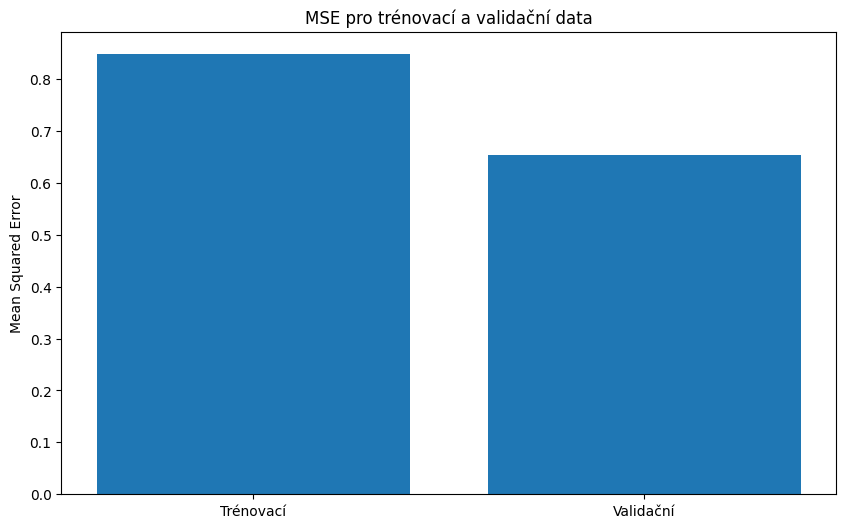

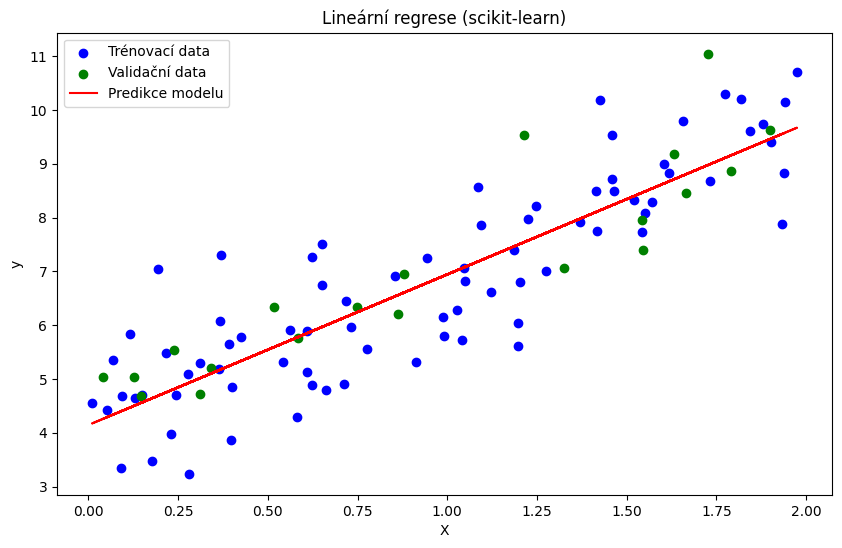

In [7]:
# Předpokládám, že již máte načtená data do proměnných X a y
# Pokud ne, načtěte je zde

# Rozdělení dat na trénovací a validační
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vytvoření a trénování modelu
model = LinearRegression()
model.fit(X_train, y_train)

# Výpis parametrů modelu
print("Parametry modelu:")
print(f"Váhy: {model.coef_}")
print(f"Bias: {model.intercept_}")

# Výpočet a výpis skóre
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)
print(f"\nSkóre modelu (R^2):")
print(f"Trénovací data: {train_score:.4f}")
print(f"Validační data: {val_score:.4f}")

# Výpočet MSE pro trénovací a validační data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

# Vykreslení grafu MSE
plt.figure(figsize=(10, 6))
plt.bar(['Trénovací', 'Validační'], [train_mse, val_mse])
plt.ylabel('Mean Squared Error')
plt.title('MSE pro trénovací a validační data')
plt.show()

# Vizualizace modelu (pro 2D data)
if X.shape[1] == 1:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='b', label='Trénovací data')
    plt.scatter(X_val, y_val, color='g', label='Validační data')
    plt.plot(X, model.predict(X), color='r', label='Predikce modelu')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Lineární regrese (scikit-learn)')
    plt.legend()
    plt.show()
else:
    print("Data mají více než jednu dimenzi, 2D vizualizace není možná.")

# Pro 3D vizualizaci (pokud máte 2 nezávislé proměnné)
if X.shape[1] == 2:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', label='Trénovací data')
    ax.scatter(X_val[:, 0], X_val[:, 1], y_val, c='g', label='Validační data')
    
    # Vytvoření mřížky pro predikci
    x0_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
    x1_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
    xx0, xx1 = np.meshgrid(x0_range, x1_range)
    Z = model.predict(np.c_[xx0.ravel(), xx1.ravel()]).reshape(xx0.shape)
    
    ax.plot_surface(xx0, xx1, Z, alpha=0.5)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    ax.legend()
    plt.title('Lineární regrese (scikit-learn) - 3D vizualizace')
    plt.show()
